## Estimating 2D Entropy with $S$ as the controlling step-size
@author: Ofer Shir, oshir@alumni.Princeton.EDU


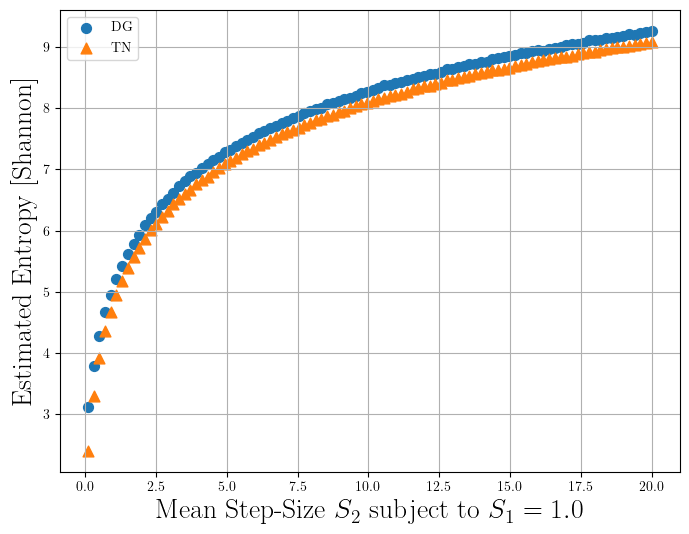

In [23]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy.stats import multivariate_normal
import EntropyEstimation as EE
import rotateUncorrelatedZ as R
import L1correlation as L1
ee = False
num_samples = 50000  # Number of samples
nz = 2 #np.sqrt(2) #dimension
S_values = np.linspace(0.1, 20, 100)  # From narrow to wide distributions
eDG,eTN = np.zeros_like(S_values),np.zeros_like(S_values)
# sigma_values = S_values / (np.sqrt(2 / np.pi))
S1 = 1.0
p1 = 1.0 - ( (S1/1) / (1.0+np.sqrt(1+((S1/1)**2))) )
c11 = np.sqrt(np.pi/2) * S1/1
for i, S2 in enumerate(S_values) : #<======= iterate over S_values
    theta = np.array([0.0]) #np.array([0.5 * np.arctan(2 * corr / (c11 - c22))])
    c22 = np.sqrt(np.pi/2) * S2/1
    p2 = 1.0 - ( (S2/1) / (1.0+np.sqrt(1+((S2/1)**2))) )
#    
    DG_samples = R.generatePopulation_2D_DG(p1=p1, p2=p2, alpha12=theta, num_samples=num_samples)
    eDG[i] = EE.histogram_entropy_multivariate(DG_samples, bins=100+i*4)
#
    TN_samples = R.generatePopulation_2D_TN(sigma1=c11, sigma2=c22, alpha12=theta, num_samples=num_samples) #np.random.multivariate_normal([0, 0], Sigma , num_samples ) #[[c11, corr], [corr, c22]]
    eTN[i] = EE.histogram_entropy_multivariate(TN_samples, bins=100+i*4)
    #
plt.figure(figsize=(8, 6))
plt.scatter(S_values, eDG, label='DG',color='tab:blue', marker='o', s=50)
plt.scatter(S_values, eTN, label='TN',color='tab:orange', marker='^', s=60)
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.xlabel(r"Mean Step-Size $S_2$ subject to $S_1=1.0$",fontsize=20) # plt.xlabel(r"$\sigma$",fontsize=20)
plt.ylabel(r"Estimated Entropy [Shannon]",fontsize=20)
# plt.title('Entropy of Truncated Gaussian Distribution vs. $\\sigma$')
plt.grid(True)
# plt.ylim(0,8)
# plt.xlim(0,25)
plt.legend()
plt.savefig("entropy2Duncorrelated.svg",format='svg')
plt.show()

## Retake: evaluate via a loop over various $S$ values (as in correlations)

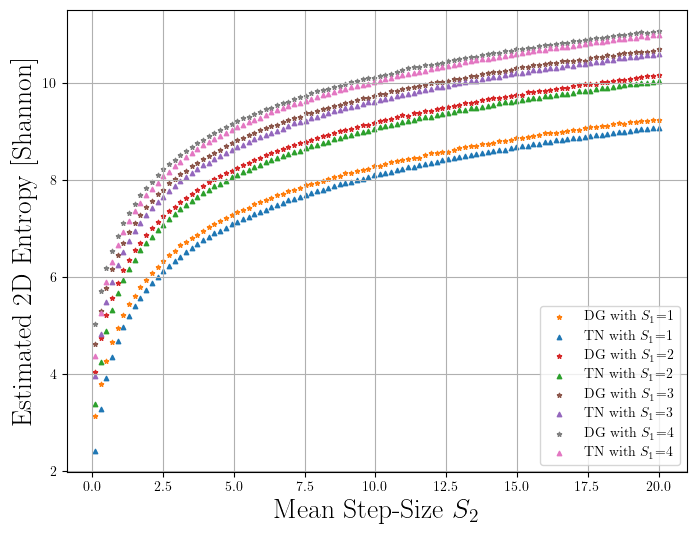

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import rotateUncorrelatedZ as R
import EntropyEstimation as EE
num_samples = 50000  # Number of samples
theta_values = np.linspace(0.0, 0.5*np.pi, 200)
# theta_labels = ["$0.0$","$\pi/8$","$\pi/4$","$\pi/2$"]

S1_values = [1,2,3,4]
S2_values = np.linspace(0.1, 20, 100)
theta = np.array([0.0])
plt.figure(figsize=(8, 6))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']
# Loop over different values of S
for idx, S in enumerate(S1_values):
    S1 = S
    p1 = 1.0 - ( (S1/1) / (1.0+np.sqrt(1+((S1/1)**2))) )
    c11 = np.sqrt(np.pi/2) * S1/1
    eDG,eTN = np.zeros_like(S2_values),np.zeros_like(S2_values)
    for i, t in enumerate(S2_values):
        S2 = t
        p2 = 1.0 - ( (S2/1) / (1.0+np.sqrt(1+((S2/1)**2))) )
        c22 = np.sqrt(np.pi/2) * S2/1
        
        DG_samples = R.generatePopulation_2D_DG(p1=p1, p2=p2, alpha12=theta, num_samples=num_samples)
        eDG[i] = EE.histogram_entropy_multivariate(DG_samples, bins=100+i*4)
#
        TN_samples = R.generatePopulation_2D_TN(sigma1=c11, sigma2=c22, alpha12=theta, num_samples=num_samples) #np.random.multivariate_normal([0, 0], Sigma , num_samples ) #[[c11, corr], [corr, c22]]
        eTN[i] = EE.histogram_entropy_multivariate(TN_samples, bins=100+i*4)
    #

    plt.scatter(S2_values, eDG, label=f"DG with $S_1$={S}",marker='*', color=colors[2*idx+1], s=10)
    plt.scatter(S2_values, eTN, label=f"TN with $S_1$={S}",marker='^', color=colors[2*idx], s=10)
# plt.scatter(theta_values, nNN, label='Multivariate Normal with $S_2=2.0$',color='tab:green', marker='*', s=50)
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.xlabel(r"Mean Step-Size $S_2$",fontsize=20) # plt.xlabel(r"$\sigma$",fontsize=20)
plt.ylabel(r"Estimated 2D Entropy [Shannon]",fontsize=20)
plt.grid(True)
# plt.ylim(0,8)
# plt.xlim(0,25)
plt.legend()
plt.savefig("entropy2Duncorrelated.svg",format='svg')
plt.show()

## Estimating 2D Entropy with $S_1=1.0$ $S_2=2.0$ as a function of rotations

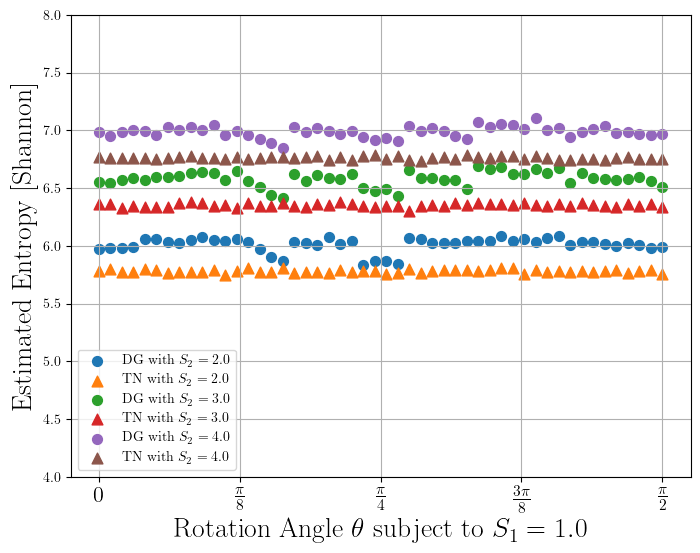

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import EntropyEstimation as EE
import rotateUncorrelatedZ as R
num_samples = 10000  # Number of samples
nz = 2 #np.sqrt(2) #dimension
theta_values = np.linspace(0.0, 0.5*np.pi, 50)  # From narrow to wide distributions
eDG,eTN = np.zeros_like(theta_values),np.zeros_like(theta_values)
eDG3,eTN3 = np.zeros_like(theta_values),np.zeros_like(theta_values)
eDG4,eTN4 = np.zeros_like(theta_values),np.zeros_like(theta_values)
S1 = 1.0 #1*np.sqrt(2.0/(np.pi))*c11 #(c11/nz) with nz=np.sqrt(2)
S2 = 2.0 #1*np.sqrt(2.0/(np.pi))*c22 #(c22/nz) with nz=np.sqrt(2)
S3 = 3.0
S4 = 4.0
# Set parameters for the geometric distributions - following the transformation S==>p per S=1.0 and n=2
p1 = 1.0 - ( (S1/1) / (1.0+np.sqrt(1+((S1/1)**2))) )
p2 = 1.0 - ( (S2/1) / (1.0+np.sqrt(1+((S2/1)**2))) )
p3 = 1.0 - ( (S3/1) / (1.0+np.sqrt(1+((S3/1)**2))) )
p4 = 1.0 - ( (S4/1) / (1.0+np.sqrt(1+((S4/1)**2))) )
c11 = np.sqrt(np.pi/2) * S1/1
c22 = np.sqrt(np.pi/2) * S2/1
sigma3 = np.sqrt(np.pi/2) * S3/1
sigma4 = np.sqrt(np.pi/2) * S4/1
for i, t in enumerate(theta_values) : #<======= iterate over S_values
    theta = np.array([t]) #np.array([0.5 * np.arctan(2 * corr / (c11 - c22))])
    #    
    DG_samples = R.generatePopulation_2D_DG(p1=p1, p2=p2, alpha12=theta, num_samples=num_samples)
    eDG[i] = EE.histogram_entropy_multivariate(DG_samples, bins=250)
    DG_samples3 = R.generatePopulation_2D_DG(p1=p1, p2=p3, alpha12=theta, num_samples=num_samples)
    eDG3[i] = EE.histogram_entropy_multivariate(DG_samples3, bins=250)
    DG_samples4 = R.generatePopulation_2D_DG(p1=p1, p2=p4, alpha12=theta, num_samples=num_samples)
    eDG4[i] = EE.histogram_entropy_multivariate(DG_samples4, bins=250)
#
    TN_samples = R.generatePopulation_2D_TN(sigma1=c11, sigma2=c22, alpha12=theta, num_samples=num_samples) #np.random.multivariate_normal([0, 0], Sigma , num_samples ) #[[c11, corr], [corr, c22]]
    eTN[i] = EE.histogram_entropy_multivariate(TN_samples, bins=250)
    TN_samples3 = R.generatePopulation_2D_TN(sigma1=c11, sigma2=sigma3, alpha12=theta, num_samples=num_samples)
    TN_samples4 = R.generatePopulation_2D_TN(sigma1=c11, sigma2=sigma4, alpha12=theta, num_samples=num_samples)
    eTN3[i] = EE.histogram_entropy_multivariate(TN_samples3, bins=250)
    eTN4[i] = EE.histogram_entropy_multivariate(TN_samples4, bins=250)
    #
plt.figure(figsize=(8, 6))
plt.scatter(theta_values, eDG, label='DG with $S_2=2.0$',color='tab:blue', marker='o', s=50)
plt.scatter(theta_values, eTN, label='TN with $S_2=2.0$',color='tab:orange', marker='^', s=60)
plt.scatter(theta_values, eDG3, label='DG with $S_2=3.0$',color='tab:green', marker='o', s=50)
plt.scatter(theta_values, eTN3, label='TN with $S_2=3.0$',color='tab:red', marker='^', s=60)
plt.scatter(theta_values, eDG4, label='DG with $S_2=4.0$',color='tab:purple', marker='o', s=50)
plt.scatter(theta_values, eTN4, label='TN with $S_2=4.0$',color='tab:brown', marker='^', s=60)

plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.xlabel(r"Rotation Angle $\theta$ subject to $S_1=1.0$",fontsize=20) # plt.xlabel(r"$\sigma$",fontsize=20)
plt.ylabel(r"Estimated Entropy [Shannon]",fontsize=20)
# Set x-ticks at fractions of pi
tick_positions = [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
tick_labels = ['0', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$', r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$']

# Add the x-ticks
plt.xticks(tick_positions, tick_labels,fontsize=16)
# plt.title('Entropy of Truncated Gaussian Distribution vs. $\\sigma$')
plt.grid(True)
plt.ylim(4,8)
# plt.xlim(0,25)
plt.legend()
plt.savefig("entropy2DCorrelated.svg",format='svg')
plt.show()

## Retake via a proper loop

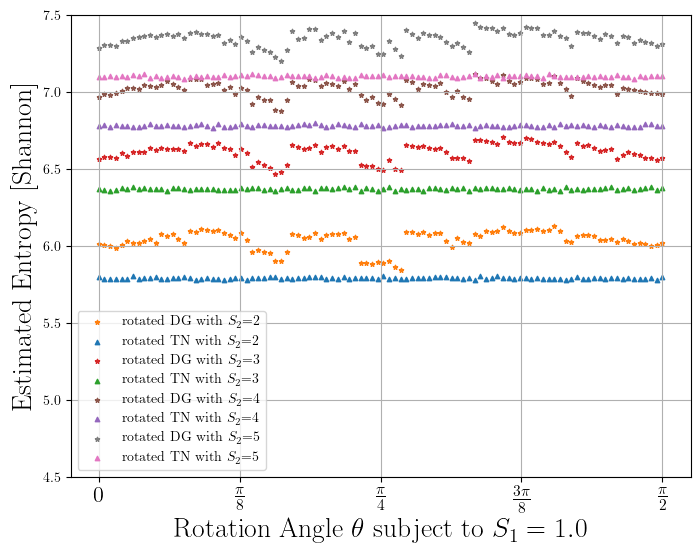

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import EntropyEstimation as EE
import rotateUncorrelatedZ as R
num_samples = 50000  # Number of samples
theta_values = np.linspace(0.0, 0.5*np.pi, 100)
# theta_labels = ["$0.0$","$\pi/8$","$\pi/4$","$\pi/2$"]
S1 = 1.0 #1*np.sqrt(2.0/(np.pi))*c11 #(c11/nz) with nz=np.sqrt(2)
p1 = 1.0 - ( (S1/1) / (1.0+np.sqrt(1+((S1/1)**2))) )
c11 = np.sqrt(np.pi/2) * S1/1
S_values = [2,3,4,5]
plt.figure(figsize=(8, 6))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']
# Loop over different values of S
for idx, S in enumerate(S_values):
    # title = f'sigma-vs-S_N{n}'
    eDG,eTN = np.zeros_like(theta_values),np.zeros_like(theta_values)
#
    S2 = S
    p2 = 1.0 - ( (S2/1) / (1.0+np.sqrt(1+((S2/1)**2))) )
    c22 = np.sqrt(np.pi/2) * S2/1

    for i, t in enumerate(theta_values):
        theta = np.array([t])
        DG_samples = R.generatePopulation_2D_DG(p1=p1, p2=p2, alpha12=theta, num_samples=num_samples)
        eDG[i] = EE.histogram_entropy_multivariate(DG_samples, bins=250)
    #
        TN_samples = R.generatePopulation_2D_TN(sigma1=c11, sigma2=c22, alpha12=theta, num_samples=num_samples)
        eTN[i] = EE.histogram_entropy_multivariate(TN_samples, bins=250)
    #
#

    plt.scatter(theta_values, eDG, label=f"rotated DG with $S_2$={S}",marker='*', color=colors[2*idx+1], s=10)
    plt.scatter(theta_values, eTN, label=f"rotated TN with $S_2$={S}",marker='^', color=colors[2*idx], s=10)
# 
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.xlabel(r"Rotation Angle $\theta$ subject to $S_1=1.0$",fontsize=20) # plt.xlabel(r"$\sigma$",fontsize=20)
plt.ylabel(r"Estimated Entropy [Shannon]",fontsize=20)
# Set x-ticks at fractions of pi
tick_positions = [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
tick_labels = ['0', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$', r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$']

# Add the x-ticks
plt.xticks(tick_positions, tick_labels,fontsize=16)
# plt.title('Entropy of Truncated Gaussian Distribution vs. $\\sigma$')
plt.grid(True)
plt.ylim(4.5,7.5)
# plt.xlim(0,25)
plt.legend()
plt.savefig("entropy2DCorrelated.svg",format='svg')
plt.show()